# Пробуем разные приколы! 

На самой первой паре мы много говорили про Keras, высокоуровневое API для Tensorflow. Он позволяет быстро и без боли учить нейронки, в которых не встречается особо много извращений. В этой тетрадке мы окунёмся в него чуть глубже. Работать по-прежнему будем с одеждой. 

In [1]:
import numpy as np
import tensorflow as tf
tf.__version__ 

'2.2.0'

In [2]:
from tensorflow.keras import Sequential
keras, L = tf.keras, tf.keras.layers

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train/ 255.
X_val = X_val/ 255.
X_test = X_test/ 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

# 1. Инициализация и батчнорм

Мы сегодня говорили о батч-нормализации и про то, как правильно в нейросетках делается инициализация весов. Давайте закрепим эти знания на практике, и переработаем их в навыки.

In [5]:
# Помните зачем эта функция? :3 
# Мы довольно активно использовали её, когда говорили про градиентные спуски

def plot_history(histories, key='loss', start=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch[start:], history.history['val_'+key][start:],
                       #'--', 
                       label=name.title()+' Val')
            #plt.plot(history.epoch[start:], history.history[key][start:], color=val[0].get_color(),
            #     label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([start, max(history.epoch)])
    pass

### Задание 1:

Для начала реализуйте простую нейросеть:
* принимает на вход картинки размера 28 x 28
* вытягивает их в вектор (`keras.layers.Flatten`)
* пропускает через $6$ полносвязных слоёв с сотней нейронов и вашей любимой функцией активации
* на выходе предсказывает веротятности принадлежности к каждому из 10 классов
* при обучении сетки поставьте размер батча $500$, учите сетку $20$ эпох

__Важно:__ поскольку в y_train лежат номера классов, керасу нужно либо указать sparse функции потерь и метрики (`sparse_categorical_crossentropy` и `sparse_categorical_accuracy`), либо конвертировать y в one-hot формат.

__Ещё важнее:__ при большом батче модель будет быстрее проходить эпохи. Когда он очень большой, необходимо довольно много эпох для сходимости. Градиент обновляется редко. Когда размер батча совсем маленький, сетка может обучаться довольно шумно. 

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше

model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer='random_normal'))
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = 'random_normal'))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

In [7]:
hist1 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
100/100 [==============================] - 1s 7ms/step - loss: 2.2150 - sparse_categorical_accuracy: 0.3145 - val_loss: 1.8147 - val_sparse_categorical_accuracy: 0.3848
Epoch 2/20
100/100 [==============================] - 1s 5ms/step - loss: 1.2439 - sparse_categorical_accuracy: 0.4965 - val_loss: 1.0320 - val_sparse_categorical_accuracy: 0.5631
Epoch 3/20
100/100 [==============================] - 1s 5ms/step - loss: 0.9522 - sparse_categorical_accuracy: 0.6014 - val_loss: 0.9056 - val_sparse_categorical_accuracy: 0.6313
Epoch 4/20
100/100 [==============================] - 1s 5ms/step - loss: 0.8458 - sparse_categorical_accuracy: 0.6656 - val_loss: 0.8273 - val_sparse_categorical_accuracy: 0.6771
Epoch 5/20
100/100 [==============================] - 1s 5ms/step - loss: 0.7942 - sparse_categorical_accuracy: 0.6872 - val_loss: 0.7910 - val_sparse_categorical_accuracy: 0.6924
Epoch 6/20
100/100 [==============================] - 1s 6ms/step - loss: 0.7613 - sparse_categorica

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
re_lu (ReLU)                 (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 100)               0

### Задание 2:

Возьмите ту же нейросетку и в качестве инициализации используйте либо инициализацию Хе либо Глорота (в зависимости от выбранных вами функций активации). 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
## ???
init = 'he_uniform'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

hist2 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
100/100 [==============================] - 1s 6ms/step - loss: 1.4352 - sparse_categorical_accuracy: 0.5456 - val_loss: 0.7621 - val_sparse_categorical_accuracy: 0.7385
Epoch 2/20
100/100 [==============================] - 1s 5ms/step - loss: 0.6226 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5555 - val_sparse_categorical_accuracy: 0.8098
Epoch 3/20
100/100 [==============================] - 1s 5ms/step - loss: 0.5139 - sparse_categorical_accuracy: 0.8194 - val_loss: 0.4954 - val_sparse_categorical_accuracy: 0.8278
Epoch 4/20
100/100 [==============================] - 1s 6ms/step - loss: 0.4662 - sparse_categorical_accuracy: 0.8378 - val_loss: 0.4612 - val_sparse_categorical_accuracy: 0.8377
Epoch 5/20
100/100 [==============================] - 1s 5ms/step - loss: 0.4394 - sparse_categorical_accuracy: 0.8471 - val_loss: 0.4387 - val_sparse_categorical_accuracy: 0.8461
Epoch 6/20
100/100 [==============================] - 1s 5ms/step - loss: 0.4185 - sparse_categorica

### Задание 3:

Берём ту же самую сетку и добавляем в неё батч-нормализацию после каждго слоя. Инициализацию замените назад на равномерную. 

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
init = 'uniform'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

hist3 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))



Epoch 1/20
100/100 [==============================] - 1s 11ms/step - loss: 1.6125 - sparse_categorical_accuracy: 0.6434 - val_loss: 2.3020 - val_sparse_categorical_accuracy: 0.0997
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.9661 - sparse_categorical_accuracy: 0.8103 - val_loss: 2.2637 - val_sparse_categorical_accuracy: 0.1747
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6976 - sparse_categorical_accuracy: 0.8524 - val_loss: 1.7878 - val_sparse_categorical_accuracy: 0.7035
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5532 - sparse_categorical_accuracy: 0.8689 - val_loss: 0.9639 - val_sparse_categorical_accuracy: 0.8461
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 0.4650 - sparse_categorical_accuracy: 0.8816 - val_loss: 0.5784 - val_sparse_categorical_accuracy: 0.8656
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 0.4065 - sparse_categoric

### Задание 4:

А теперь сразу и инициализация и батч-нормализация.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
init = 'he_uniform'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

hist4 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))




Epoch 1/20
100/100 [==============================] - 1s 10ms/step - loss: 1.6147 - sparse_categorical_accuracy: 0.4915 - val_loss: 1.6038 - val_sparse_categorical_accuracy: 0.6039
Epoch 2/20
100/100 [==============================] - 1s 10ms/step - loss: 0.8733 - sparse_categorical_accuracy: 0.7432 - val_loss: 0.9436 - val_sparse_categorical_accuracy: 0.7333
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6619 - sparse_categorical_accuracy: 0.7905 - val_loss: 0.6715 - val_sparse_categorical_accuracy: 0.7890
Epoch 4/20
100/100 [==============================] - 1s 10ms/step - loss: 0.5576 - sparse_categorical_accuracy: 0.8175 - val_loss: 0.5555 - val_sparse_categorical_accuracy: 0.8145
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 0.4941 - sparse_categorical_accuracy: 0.8353 - val_loss: 0.5027 - val_sparse_categorical_accuracy: 0.8280
Epoch 6/20
100/100 [==============================] - 1s 10ms/step - loss: 0.4509 - sparse_catego

### Задание 5:

Дело осталось за малым. Нарисовать траектории обучения всех сеток на одной картинке и сравнить их между собой.

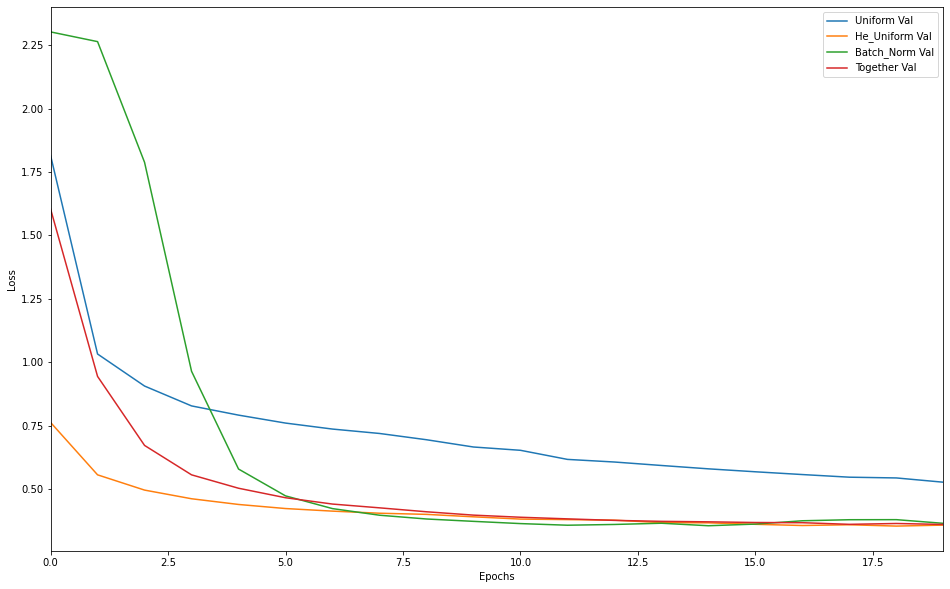

In [12]:
plot_history([('uniform',    hist1), 
              ('he_uniform', hist2),
              ('batch_norm', hist3),
              ('together',   hist4)
             ],
             start=0)

## 2. Функции активации  

### Задание 6:

Давайте попробуем поймать эффект, когда у нашей нейронки наступает паралич. Возьмите самый первый вариант нейросетки и замените все функции активации на сигмоиды. 



In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
init = 'uniform'
act = 'sigmoid'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init,activation=act))
model.add(L.Dense(100, kernel_initializer=init,activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init,activation=act))

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
hist5 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))


tf.random.set_seed(42)

Epoch 1/20
100/100 [==============================] - 1s 6ms/step - loss: 2.3035 - sparse_categorical_accuracy: 0.1011 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.1016
Epoch 2/20
100/100 [==============================] - 1s 6ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.0991 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0997
Epoch 3/20
100/100 [==============================] - 1s 6ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0947
Epoch 4/20
100/100 [==============================] - 1s 6ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.0995 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0947
Epoch 5/20
100/100 [==============================] - 1s 6ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0982 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0947
Epoch 6/20
100/100 [==============================] - 1s 5ms/step - loss: 2.3028 - sparse_categorica

### Задание 7:  

Теперь попробуем взять вместо сигмоид elu

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'uniform'
act = 'elu' # в таком варианте alpha = 1 
            # если хочется его подергать: L.ELU(alpha=1.0)
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init,activation=act))
model.add(L.Dense(100, kernel_initializer=init,activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init, activation=act))
model.add(L.Dense(100, kernel_initializer=init,activation=act))

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
hist6 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))


tf.random.set_seed(42)

Epoch 1/20
100/100 [==============================] - 1s 6ms/step - loss: 2.1265 - sparse_categorical_accuracy: 0.2181 - val_loss: 1.7051 - val_sparse_categorical_accuracy: 0.1970
Epoch 2/20
100/100 [==============================] - 1s 6ms/step - loss: 1.6278 - sparse_categorical_accuracy: 0.2514 - val_loss: 1.4806 - val_sparse_categorical_accuracy: 0.3808
Epoch 3/20
100/100 [==============================] - 1s 7ms/step - loss: 1.1828 - sparse_categorical_accuracy: 0.4934 - val_loss: 1.0204 - val_sparse_categorical_accuracy: 0.5808
Epoch 4/20
100/100 [==============================] - 1s 5ms/step - loss: 0.9624 - sparse_categorical_accuracy: 0.6056 - val_loss: 0.9253 - val_sparse_categorical_accuracy: 0.6304
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.8925 - sparse_categorical_accuracy: 0.6456 - val_loss: 0.8747 - val_sparse_categorical_accuracy: 0.6564
Epoch 6/20
100/100 [==============================] - 1s 5ms/step - loss: 0.8436 - sparse_categorica

### Задание 8:

Снова сравниваем модели между собой.

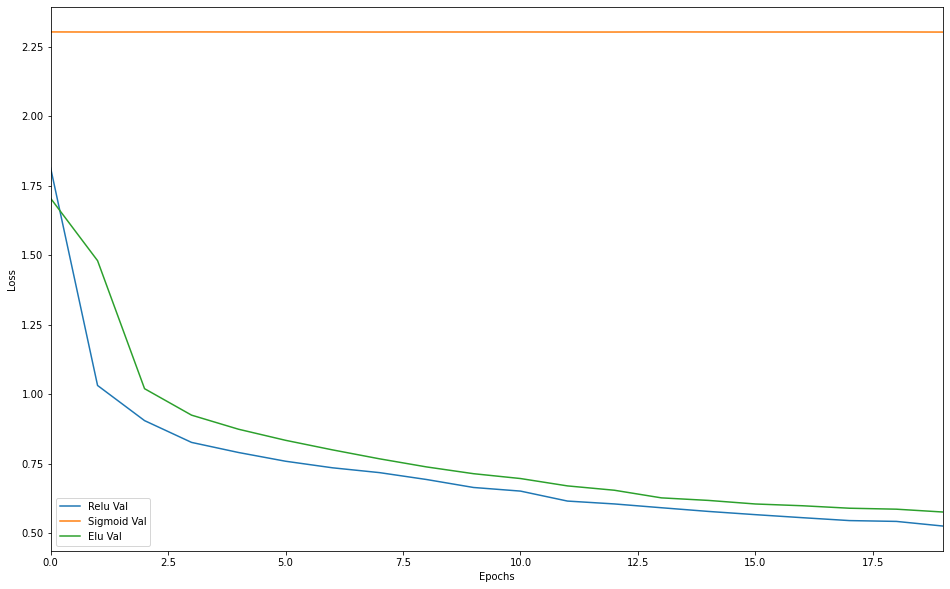

In [15]:
plot_history([('relu',   hist1), 
              ('sigmoid', hist5),
              ('elu',   hist6),
             ],
             start=0)

# 3. Keras бывет разным, про skip-connection

На первой паре мы с вами говорили, что в Keras задавать модели можно по-разному. Второй способ делать это: функциональный стиль. Он даёт на порядок больше возможностей. Давайте посмотрим как это выглядит и попробуем собрать пару моделей. 

In [16]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

# показываем, что к x нужно применить рпедыдущий выход input_tensor
x = L.Flatten()(input_tensor)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

# в модеоли указываем инпут и аутпут
# tf попробует получить из анпута аутпут
# из ограничений: недопустимы циклические графы, т.е. чтобы input зависел от например output
model = keras.Model(input_tensor, output_tensor)

In [17]:
model.compile("adam", loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=1, batch_size=500, verbose=1)

100/100 [==============================] - 1s 6ms/step - loss: 1.4845 - sparse_categorical_accuracy: 0.3808 - val_loss: 1.0343 - val_sparse_categorical_accuracy: 0.5070


In [ ]:
# skip-connection: можем прокинуть сырые данные без применения части слоев в сетке

Помните статью про то, как люди рисовали функции потерь? [Теперь появилась галерея!](https://losslandscape.com/gallery/) На паре про градиентный спуск мы говорили, что skip-connection довольно здорово меняет ландшафт функции потерь. 

![](https://i.stack.imgur.com/UDvbg.png)

Такую модель нельзя собрать через `Sequence`-стиль, но можно через функциональный стиль. Давайте попробуем сделать это. Заодно посмотрим насколько сильно в нашей ситуации будет меняться траектория обучения. 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'he_uniform'
act = 'elu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x1)
# на данном этапе уже применили два слоя
# объединили выходы этих слоев с изначальными данными
x = L.concatenate([x, x1])

x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x, x1])

x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x, x1])

output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.compile("adam", loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

history7 = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                     epochs=20, batch_size=500, verbose=1)

Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6325 - sparse_categorical_accuracy: 0.7748 - val_loss: 0.4556 - val_sparse_categorical_accuracy: 0.8362
Epoch 2/20
100/100 [==============================] - 1s 8ms/step - loss: 0.4212 - sparse_categorical_accuracy: 0.8503 - val_loss: 0.4093 - val_sparse_categorical_accuracy: 0.8501
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.3772 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3938 - val_sparse_categorical_accuracy: 0.8534
Epoch 4/20
100/100 [==============================] - 1s 7ms/step - loss: 0.3478 - sparse_categorical_accuracy: 0.8736 - val_loss: 0.3463 - val_sparse_categorical_accuracy: 0.8718
Epoch 5/20
100/100 [==============================] - 1s 7ms/step - loss: 0.3255 - sparse_categorical_accuracy: 0.8808 - val_loss: 0.3781 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/20
100/100 [==============================] - 1s 7ms/step - loss: 0.3133 - sparse_categorica

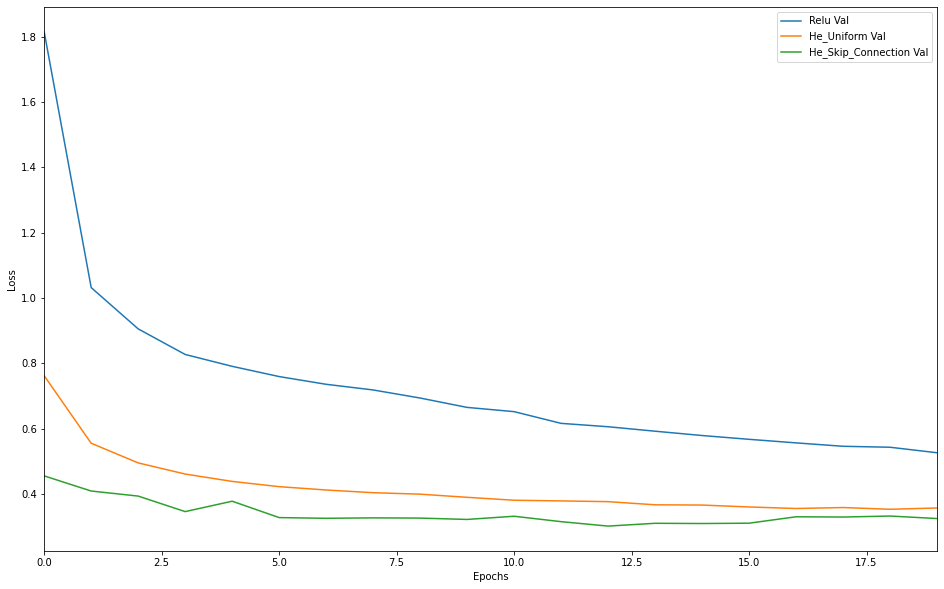

In [24]:
plot_history([('relu', hist1), 
              ('he_uniform', hist2),
              ('he_skip_connection', history7)
             ],
             start=0)

# 4. Ещё немного функционального API 


## 4.1 Несколько входов

В этом примере на вход идёт две картинки.

In [25]:
# у нас два канала, которые затем объединяются в одну
input_1 = L.Input(shape=(28, 28))
input_2 = L.Input(shape=(28, 28))

# первый канал
x1 = L.Flatten()(input_1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)

# второй канал
x2 = L.Flatten()(input_2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)

# собрали каналы
x = L.concatenate([x1, x2])
# прописали выход
output = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

# передаем список входов и выход в модель
model = keras.Model([input_1, input_2], output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_8 (Flatten)             (None, 784)          0           input_9[0][0]                    
__________________________________________________________________________________________________
flatten_9 (Flatten)             (None, 784)          0           input_10[0][0]                   
____________________________________________________________________________________________

Немного бессмысленный пример обучения, когда на вход идут две одинаковые картиночки.

In [26]:
model.compile("adam", loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val),
          epochs=2, batch_size=500)

Epoch 1/2
100/100 [==============================] - 1s 7ms/step - loss: 0.6217 - sparse_categorical_accuracy: 0.7820 - val_loss: 0.4685 - val_sparse_categorical_accuracy: 0.8318
Epoch 2/2
100/100 [==============================] - 1s 6ms/step - loss: 0.4321 - sparse_categorical_accuracy: 0.8462 - val_loss: 0.4253 - val_sparse_categorical_accuracy: 0.8472


## 4.2 Несколько выходов и функций потерь

In [ ]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x)

output_1 = L.Dense(10, kernel_initializer=init, activation='softmax')(x1)
output_2 = L.Dense(10, kernel_initializer=init, activation='softmax')(x2)
output_3 = L.Dense(10, kernel_initializer=init, activation='softmax')(x3)

model = keras.Model(input_tensor, [output_1, output_2, output_3])

model.summary()

In [ ]:
# например, хоти решить сразу несколько задач по тексту: понять семантику и к какому типу принадлежит
# прописываем список loss, каждому loss приписываем свой вес, чтобы модель не переобучалась по одной из метрик, если шкалы у метрик разные
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy',
                                      'sparse_categorical_crossentropy', 
                                      'sparse_categorical_crossentropy'],
                                    loss_weights=[0.25, 1., 10.])

model.fit(X_train, [y_train, y_train, y_train], epochs=2, batch_size=500)

Пример с разными функциями потерь:

### Дополнительное задание  :

Мы говорили, что если мы используем BN, то нужно уменьшить силу Dropout. Поэтому попробуйте сравнить Dropout + BN c разным p.

In [28]:
tf.random.set_seed(42)
init = 'he_uniform'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.5))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.5))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.5))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.5))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.5))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.5))

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

hist9 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
100/100 [==============================] - 1s 11ms/step - loss: 2.9393 - sparse_categorical_accuracy: 0.1014 - val_loss: 2.2997 - val_sparse_categorical_accuracy: 0.1101
Epoch 2/20
100/100 [==============================] - 1s 10ms/step - loss: 2.8077 - sparse_categorical_accuracy: 0.1070 - val_loss: 2.2953 - val_sparse_categorical_accuracy: 0.1403
Epoch 3/20
100/100 [==============================] - 1s 10ms/step - loss: 2.6843 - sparse_categorical_accuracy: 0.1192 - val_loss: 2.2565 - val_sparse_categorical_accuracy: 0.2106
Epoch 4/20
100/100 [==============================] - 1s 10ms/step - loss: 2.5496 - sparse_categorical_accuracy: 0.1358 - val_loss: 2.2199 - val_sparse_categorical_accuracy: 0.1764
Epoch 5/20
100/100 [==============================] - 1s 10ms/step - loss: 2.4117 - sparse_categorical_accuracy: 0.1639 - val_loss: 2.1664 - val_sparse_categorical_accuracy: 0.1776
Epoch 6/20
100/100 [==============================] - 1s 10ms/step - loss: 2.2750 - sparse_cate

In [29]:
tf.random.set_seed(42)
init = 'he_uniform'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

hist10 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
100/100 [==============================] - 2s 17ms/step - loss: 2.0360 - sparse_categorical_accuracy: 0.3152 - val_loss: 1.6918 - val_sparse_categorical_accuracy: 0.5687
Epoch 2/20
100/100 [==============================] - 1s 12ms/step - loss: 1.2752 - sparse_categorical_accuracy: 0.6020 - val_loss: 1.0353 - val_sparse_categorical_accuracy: 0.6820
Epoch 3/20
100/100 [==============================] - 1s 10ms/step - loss: 0.9671 - sparse_categorical_accuracy: 0.6923 - val_loss: 0.7607 - val_sparse_categorical_accuracy: 0.7495
Epoch 4/20
100/100 [==============================] - 1s 14ms/step - loss: 0.8247 - sparse_categorical_accuracy: 0.7301 - val_loss: 0.6334 - val_sparse_categorical_accuracy: 0.7821
Epoch 5/20
100/100 [==============================] - 1s 13ms/step - loss: 0.7311 - sparse_categorical_accuracy: 0.7584 - val_loss: 0.5763 - val_sparse_categorical_accuracy: 0.8030
Epoch 6/20
100/100 [==============================] - 1s 10ms/step - loss: 0.6663 - sparse_cate

In [31]:
tf.random.set_seed(42)
init = 'he_uniform'
model = Sequential()
# из картинки сделали вектор
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(100, kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dropout(0.1))

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'sparse_categorical_crossentropy', 
                  metrics=["sparse_categorical_accuracy"], 
                  optimizer=opt)
tf.random.set_seed(42)

hist11 = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
100/100 [==============================] - 1s 8ms/step - loss: 1.9289 - sparse_categorical_accuracy: 0.3082 - val_loss: 1.1197 - val_sparse_categorical_accuracy: 0.6247
Epoch 2/20
100/100 [==============================] - 1s 7ms/step - loss: 1.1535 - sparse_categorical_accuracy: 0.5831 - val_loss: 0.7637 - val_sparse_categorical_accuracy: 0.7222
Epoch 3/20
100/100 [==============================] - 1s 7ms/step - loss: 0.8917 - sparse_categorical_accuracy: 0.6771 - val_loss: 0.6520 - val_sparse_categorical_accuracy: 0.7631
Epoch 4/20
100/100 [==============================] - 1s 7ms/step - loss: 0.7671 - sparse_categorical_accuracy: 0.7233 - val_loss: 0.5808 - val_sparse_categorical_accuracy: 0.7903
Epoch 5/20
100/100 [==============================] - 1s 8ms/step - loss: 0.6892 - sparse_categorical_accuracy: 0.7526 - val_loss: 0.5330 - val_sparse_categorical_accuracy: 0.8152
Epoch 6/20
100/100 [==============================] - 1s 7ms/step - loss: 0.6329 - sparse_categorica

---